<a href="https://colab.research.google.com/github/lalitjoshiii8/bigmart/blob/main/tensorimagerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
# -1 is a shorthand, which returns the length of the dataset
x_trainr = np.array(x_train).reshape(-1, 28, 28, 1)
x_testr = np.array(x_test).reshape(-1, 28, 28, 1)

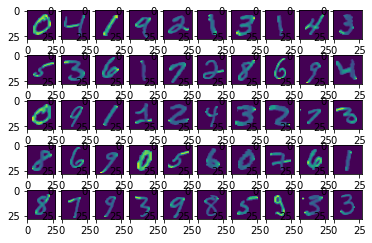

In [ ]:
for i in range(1,51):
  plt.subplot(5,10,i)
  plt.imshow(x_train[i])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# Creating the network
model = Sequential()
### First Convolution Layer
# 64 -> number of filters, (3,3) -> size of each kernal,
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) # For first layer we have to mention the size of input
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
### Second Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
### Third Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
### Fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
### Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))
### Fully connected layer 3, output layer must be equal to number of classes
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
#Tranning the model
model.fit(x_trainr, y_train, epochs=3, validation_split = 0.3)

Epoch 1/3
1313/1313 [==============================] - 95s 71ms/step - loss: 0.3463 - accuracy: 0.8887 - val_loss: 0.1218 - val_accuracy: 0.9623
Epoch 2/3
1313/1313 [==============================] - 91s 69ms/step - loss: 0.1079 - accuracy: 0.9678 - val_loss: 0.1123 - val_accuracy: 0.9662
Epoch 3/3
1313/1313 [==============================] - 96s 73ms/step - loss: 0.0773 - accuracy: 0.9763 - val_loss: 0.0714 - val_accuracy: 0.9778


In [ ]:
# Evaluating the accuracy on the test data
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Test Accuracy on 10,000 test samples", test_acc)
predictions = model.predict([x_testr])
#print(predictions)
plt.imshow(x_test[0])
print(predictions[0])
print(np.argmax(predictions[0]))

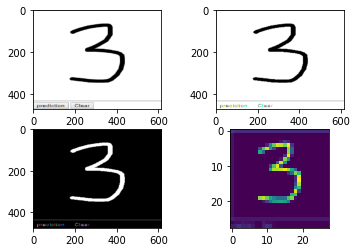

In [ ]:
import cv2
img2 = cv2.imread('/content/3.png')
#binary image
ret, img1 = cv2.threshold(img2, 75, 255, cv2.THRESH_BINARY)
# invert binary image
img = cv2.bitwise_not(img1)
plt.subplot(221)
plt.imshow(img2)
plt.subplot(222)
plt.imshow(img1)
plt.subplot(223)
plt.imshow(img)
# Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
# Resizing to a 28x28 image
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
resized.shape
#ret, bw_img = cv2.threshold(resized, 80, 255, cv2.THRESH_BINARY)
plt.subplot(224)
plt.imshow(resized)

In [ ]:
newimg = tf.keras.utils.normalize(resized, axis = 1)
# For kernal operations
newimg = np.array(newimg).reshape(-1, 28, 28, 1)
newimg.shape
predictions = model.predict(newimg)
#print(predictions[0])
print(np.argmax(predictions[0]))

1/1 [==============================] - 0s 272ms/step
3
